# S03 T01: Visualització gràfica d'un dataset #

Complementa les tècniques d'exploració de les dades mitjantçant la visualització gràfica, amb les llibreries Matplotlib i Searborn.

## Nivell 1 ##

### - Exercici 1 ###

Resumeix gràficament el data set DelayedFlights.csv

In [16]:
import pandas as pd               # data frames
import numpy as np
import matplotlib.pyplot as plt   # visualizations
import seaborn as sns

rowsToRead=100000
df = pd.read_csv('Airlines_Delay/DelayedFlights.csv', delimiter=',',nrows=rowsToRead)
df.dataframeName = 'DelayedFlights.csv'

# Print the shape of df
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         100000 non-null  int64  
 1   Year               100000 non-null  int64  
 2   Month              100000 non-null  int64  
 3   DayofMonth         100000 non-null  int64  
 4   DayOfWeek          100000 non-null  int64  
 5   DepTime            100000 non-null  float64
 6   CRSDepTime         100000 non-null  int64  
 7   ArrTime            99690 non-null   float64
 8   CRSArrTime         100000 non-null  int64  
 9   UniqueCarrier      100000 non-null  object 
 10  FlightNum          100000 non-null  int64  
 11  TailNum            100000 non-null  object 
 12  ActualElapsedTime  99690 non-null   float64
 13  CRSElapsedTime     100000 non-null  float64
 14  AirTime            99690 non-null   float64
 15  ArrDelay           99690 non-null   float64
 16  Dep

Crea almenys una visualització per:

* Una variable categòrica (UniqueCarrier)

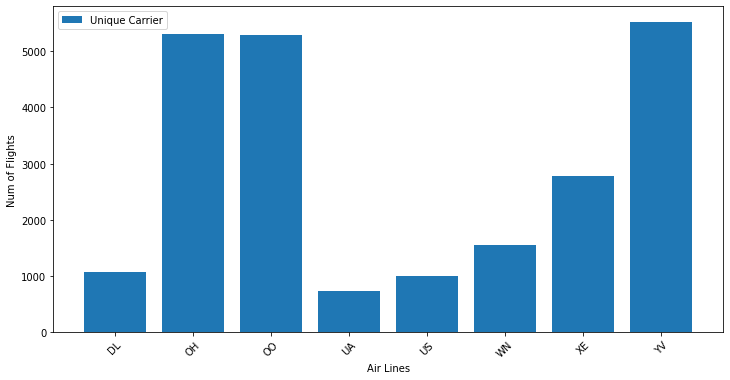

In [18]:
flightsByAirLine_group = df['FlightNum'].groupby(df['UniqueCarrier']).mean()

x = flightsByAirLine_group.index.values

fig, ax = plt.subplots(figsize = (12,6))
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),flightsByAirLine_group, align='center', label='Unique Carrier')

ax.set_xlabel('Air Lines')
ax.set_ylabel('Num of Flights')

plt.legend()

plt.savefig("flightsByAirLine_group.png")

plt.show()

* Una variable numèrica (ArrDelay)

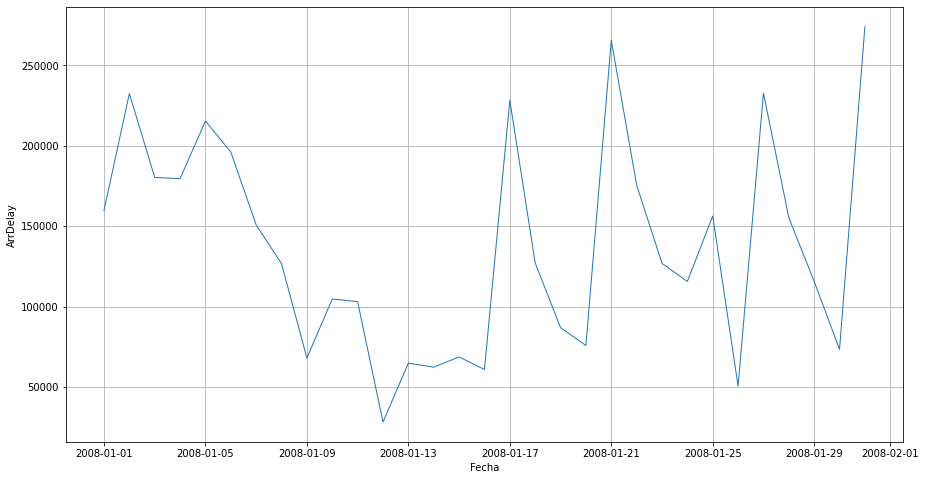

In [21]:
df['Fecha'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')
date_delay = df[['Fecha', 'ArrDelay']]
date_delay = date_delay.groupby(by='Fecha').sum()
date_delay.head()
plt.figure(figsize=(15,8))
plt.grid(True)
sns.lineplot(x="Fecha", y="ArrDelay", data=date_delay, palette="Set1", linewidth=1)
plt.savefig("ArrDelay.png")
plt.show()

* Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

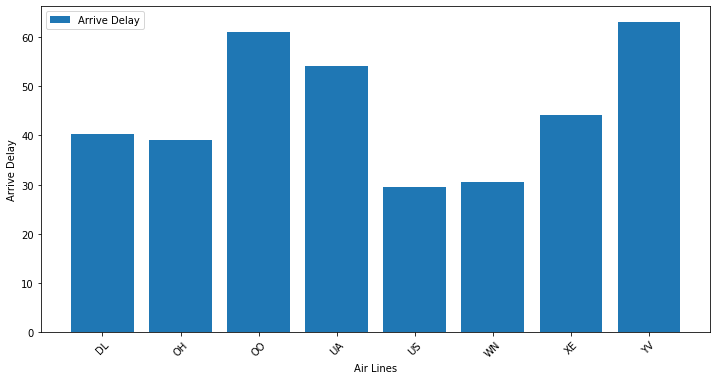

In [22]:
ArrDelayByAirLine_group = df['ArrDelay'].groupby(df['UniqueCarrier']).mean()
#print(ArrDelayByAirLine_group)

x = ArrDelayByAirLine_group.index.values

fig, ax = plt.subplots(figsize = (12,6))
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),ArrDelayByAirLine_group, align='center', label='Arrive Delay')

ax.set_xlabel('Air Lines')
ax.set_ylabel('Arrive Delay')

plt.legend()

plt.savefig("ArrDelayByAirLine_group.png")

plt.show()

* Dues variables numèriques (ArrDelay i DepDelay)

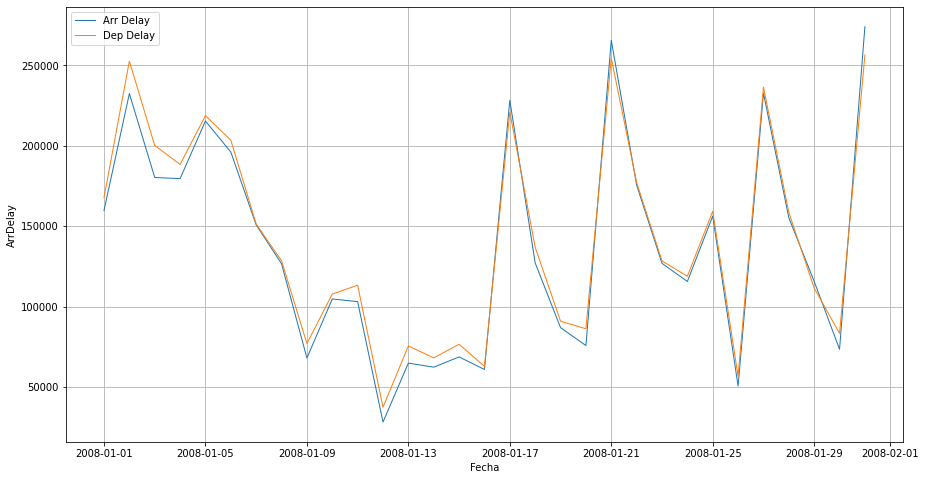

In [23]:
df['Fecha'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')
date_ArrDelay = df[['Fecha', 'ArrDelay']]
date_DepDelay = df[['Fecha', 'DepDelay']]
date_ArrDelay = date_ArrDelay.groupby(by='Fecha').sum()
date_DepDelay = date_DepDelay.groupby(by='Fecha').sum()
plt.figure(figsize=(15,8))
plt.grid(True)
sns.lineplot(x="Fecha", y="ArrDelay", data=date_ArrDelay, palette="Set2", linewidth=1, label = "Arr Delay")
sns.lineplot(x="Fecha", y="DepDelay",data=date_DepDelay, palette="Set1", linewidth=1, label = "Dep Delay")
plt.legend()
plt.savefig("ArrAndDepDelay.png")
plt.show()

* Tres variables (ArrDelay, DepDelay i UniqueCarrier)

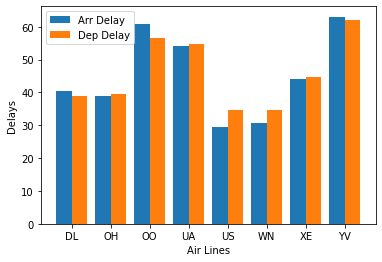

In [24]:
ArrDelay_group = df['ArrDelay'].groupby(df['UniqueCarrier']).mean()
DepDelay_group = df['DepDelay'].groupby(df['UniqueCarrier']).mean()

x = ArrDelay_group.index.values
X_axis = np.arange(len(x))
  
plt.bar(X_axis - 0.2, ArrDelay_group, 0.4, label = 'Arr Delay')
plt.bar(X_axis + 0.2, DepDelay_group, 0.4, label = 'Dep Delay')
plt.xticks(X_axis, x)
plt.xlabel('Air Lines')
plt.ylabel('Delays')

plt.legend()

plt.savefig("ArrAndDepDelayAndUniqueCarrier.png")

plt.show()

* Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

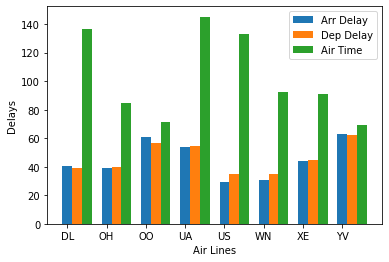

In [25]:
ArrDelay_group = df['ArrDelay'].groupby(df['UniqueCarrier']).mean()
DepDelay_group = df['DepDelay'].groupby(df['UniqueCarrier']).mean()
AirTime_group = df['AirTime'].groupby(df['UniqueCarrier']).mean()

x = ArrDelay_group.index.values
X_axis = np.arange(len(x))
  
plt.bar(X_axis + 0, ArrDelay_group, 0.25, label = 'Arr Delay')
plt.bar(X_axis + 0.25, DepDelay_group, 0.25, label = 'Dep Delay')
plt.bar(X_axis + 0.5, AirTime_group, 0.25, label = 'Air Time')
plt.xticks(X_axis, x)
plt.xlabel('Air Lines')
plt.ylabel('Delays')

plt.legend()

plt.savefig("ArrDepDelayAirTimeAndUniqueCarrier.png")

plt.show()

### - Exercici 2 ###

Exporta els gràfics com imatges o com html.

In [31]:
print("En el propi codi de l'exercisi 1 està integrat la linea 'plt.savefig('name.png')' per a cada part.")
print("Les imatges estan a la carpeta 'Exercisi 2'")

En el propi codi de l'exercisi 1 està integrat la linea 'plt.savefig('name.png')' per a cada part.
Les imatges estan a la carpeta 'Exercisi 2'


### - Exercici 3 ###

Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 2.

* Velocitat mitjana del vol

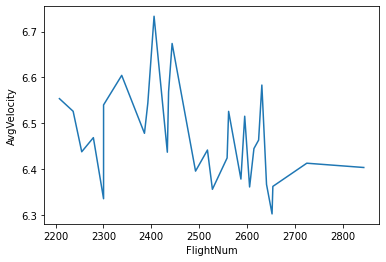

In [40]:
df["AvgVelocity"] = df["Distance"] / df["AirTime"]
df['Fecha'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')
velocity = df
date_velocity = velocity.groupby(by='Fecha').mean()
sns.lineplot(x="FlightNum", y="AvgVelocity", data=date_velocity, palette="Set2")
plt.xlabel('FlightNum')
plt.ylabel('AvgVelocity')

plt.savefig("AvgVelocity.png")

plt.show()

* Taula de les aerolínies amb més endarreriments acumulats

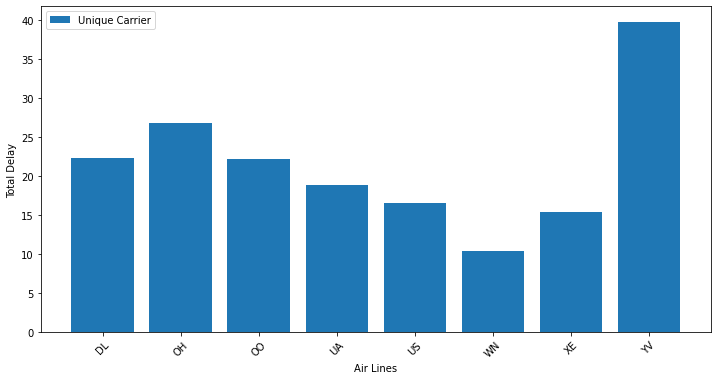

In [41]:
df['total_delay'] = (df['CarrierDelay'] + df['WeatherDelay'] + df['NASDelay'] + df['SecurityDelay'] + df['LateAircraftDelay'])

carrier_group = df['CarrierDelay'].groupby(df['UniqueCarrier']).mean()


x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (12,6))
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),carrier_group, align='center', label='Unique Carrier')

ax.set_xlabel('Air Lines')
ax.set_ylabel('Total Delay')

plt.legend()

plt.savefig("Carrier_group.png")

plt.show()

* Quins són els vols més llargs? 

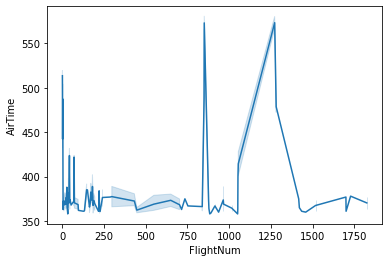

In [43]:
longerFlights = df.sort_values(by="AirTime",ascending=False).head(300)

sns.lineplot(x="FlightNum", y="AirTime", data=longerFlights, palette="Set1")
plt.xlabel('FlightNum')
plt.ylabel('AirTime')

plt.savefig("longerFlights.png")

plt.show()

Quins són els vols més endarrerits?

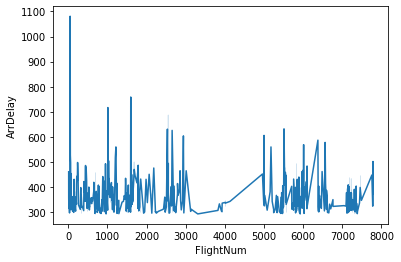

In [44]:
longerDelayed = df.sort_values(by=["ArrDelay"],ascending=False).head(500)

sns.lineplot(x="FlightNum", y="ArrDelay", data=longerDelayed, palette="Set1")
plt.xlabel('FlightNum')
plt.ylabel('ArrDelay')

plt.savefig("longerDelayed.png")

plt.show()

In [32]:
print("Les imatges estan a la carpeta 'Exercisi 3'")

Les imatges estan a la carpeta 'Exercisi 3'
